In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Layer, InputSpec
from tensorflow.keras import initializers as initializers, regularizers, constraints
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

In [15]:
data=pd.read_csv('toydata.csv',index_col='time')
data

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
time,,,,,,,,,,,,,,,,,,,,,
1,113,104,99,98,109,87,91,87,73,87,...,47,49,50,33,34,31,27,24,31,22
2,99,105,104,90,94,87,87,88,86,81,...,44,53,39,35,40,43,17,26,27,26
3,107,114,109,102,98,84,83,88,84,81,...,50,48,49,47,37,36,27,25,22,27
4,119,105,102,95,94,97,86,85,84,72,...,58,40,45,36,43,36,31,29,20,11
5,110,108,90,98,107,92,85,89,83,76,...,57,47,22,39,31,35,39,34,33,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,121,96,107,101,91,100,85,81,96,81,...,35,37,40,32,26,47,39,24,29,23
333,96,104,119,97,90,92,83,80,82,77,...,47,54,49,41,34,42,40,29,19,20
334,91,114,104,101,95,97,87,88,81,86,...,46,46,35,40,41,37,32,28,26,16


In [8]:
cols = data.columns.tolist()

In [16]:
cols=cols[::-1]
data = data[cols]

In [17]:
data

,t28,t27,t26,t25,t24,t23,t22,t21,t20,t19,...,t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
time,,,,,,,,,,,,,,,,,,,,,
1,22,31,24,27,31,34,33,50,49,47,...,87,73,87,91,87,109,98,99,104,113
2,26,27,26,17,43,40,35,39,53,44,...,81,86,88,87,87,94,90,104,105,99
3,27,22,25,27,36,37,47,49,48,50,...,81,84,88,83,84,98,102,109,114,107
4,11,20,29,31,36,43,36,45,40,58,...,72,84,85,86,97,94,95,102,105,119
5,7,33,34,39,35,31,39,22,47,57,...,76,83,89,85,92,107,98,90,108,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,23,29,24,39,47,26,32,40,37,35,...,81,96,81,85,100,91,101,107,96,121
333,20,19,29,40,42,34,41,49,54,47,...,77,82,80,83,92,90,97,119,104,96
334,16,26,28,32,37,41,40,35,46,46,...,86,81,88,87,97,95,101,104,114,91


In [18]:
from numpy import array

In [61]:
x=[]
y=[]
for i in range(336):
    x.append(data.iloc[i,].tolist()[:-8])
    y.append([data.iloc[i,].tolist()[-1]])
x=array(x)
y=array(y)


In [62]:
x.shape

(336, 21)

In [63]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(21, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [64]:
n_features = 1
x = x.reshape((336, 21, n_features))

In [65]:
model.fit(x, y, epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 1s 5ms/step - loss: 12410.4583
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 7120.7251
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 464.7953
Epoch 4/20
11/11 [==============================] - 0s 5ms/step - loss: 85.4697
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 63.2354
Epoch 6/20
11/11 [==============================] - 0s 5ms/step - loss: 61.3362
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 51.3971
Epoch 8/20
11/11 [==============================] - 0s 5ms/step - loss: 57.3914
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 51.0628
Epoch 10/20
11/11 [==============================] - 0s 5ms/step - loss: 53.0436
Epoch 11/20
11/11 [==============================] - 0s 5ms/step - loss: 45.5709
Epoch 12/20
11/11 [==============================] - 0s 5ms/step - loss: 51.2364
Epoch 13/20
11/11 [============

In [66]:
yhat = model.predict(x, verbose=1)

11/11 [==============================] - 0s 2ms/step


In [67]:
yhat=[[round(i[0])] for i in yhat]

In [68]:
yhat

[[105],
 [108],
 [108],
 [107],
 [106],
 [106],
 [102],
 [107],
 [108],
 [110],
 [108],
 [106],
 [107],
 [104],
 [110],
 [110],
 [108],
 [111],
 [108],
 [105],
 [111],
 [109],
 [108],
 [109],
 [107],
 [107],
 [107],
 [110],
 [106],
 [108],
 [110],
 [105],
 [111],
 [111],
 [107],
 [106],
 [108],
 [111],
 [104],
 [110],
 [109],
 [106],
 [114],
 [107],
 [107],
 [107],
 [97],
 [105],
 [111],
 [113],
 [109],
 [104],
 [110],
 [106],
 [109],
 [106],
 [108],
 [112],
 [106],
 [108],
 [104],
 [105],
 [109],
 [107],
 [109],
 [106],
 [109],
 [107],
 [112],
 [106],
 [103],
 [104],
 [111],
 [108],
 [108],
 [106],
 [105],
 [107],
 [109],
 [104],
 [109],
 [111],
 [104],
 [113],
 [113],
 [108],
 [110],
 [105],
 [109],
 [104],
 [108],
 [104],
 [101],
 [108],
 [110],
 [108],
 [111],
 [106],
 [112],
 [106],
 [105],
 [110],
 [109],
 [104],
 [106],
 [108],
 [110],
 [109],
 [106],
 [109],
 [108],
 [107],
 [108],
 [107],
 [110],
 [109],
 [112],
 [108],
 [106],
 [110],
 [106],
 [108],
 [106],
 [104],
 [112],
 

In [69]:
perc_diff=[(yhat[i][0]-y[i][0])/y[i][0] for i in range(336)]

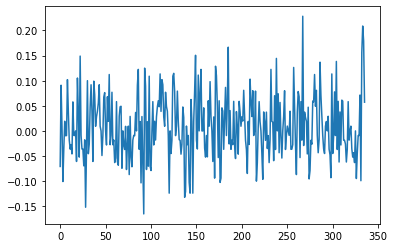

In [70]:
plot(perc_diff)

In [71]:
np.mean(np.abs(perc_diff))

0.05050969504756327

In [72]:
np.max(np.abs(perc_diff))

0.22826086956521738

the average difference is around 5%, but the error can be as high as 20% for predeiction with 1 week in advance

In [132]:
 def accountsMerge(accounts: list)-> list:
        """
        :type accounts: List[List[str]]
        :rtype: List[List[str]]
        """  
        names=[]
        emails=[]
        i=0
        record=dict()
        for r in accounts:
            if r[0] not in names:
                names.append(r[0])
                emails.append(r[1::])
                record[r[0]]=[i]
                i+=1

            else:
                y=set(r[1::])

 
                for j in record[r[0]]:

                    y = set(r[1::]).intersection(set(emails[j]))
                    if len(y)!=0:
                        emails[j]=list(set(r[1::]).union(set(emails[j])))
                        break

                if len(y)==0:
                    record[r[0]].append(i)
                    emails.append(r[1::])

                    names.append(r[0])
                    i+=1
        result=[]
        for i in range(len(names)):
            z=[names[i]]+sorted(emails[i])
            result.append(z)
        test=[]
        for r in result:
            test+=r[1::]
        if len(test)==len(set(test)):
            return(result)
        else:
            return accountsMerge(result)

In [133]:
accountsMerge(
[["David","David0@m.co","David1@m.co"],["David","David3@m.co","David4@m.co"],["David","David4@m.co","David5@m.co"],["David","David2@m.co","David3@m.co"],["David","David1@m.co","David2@m.co"]])

[['David',
  'David0@m.co',
  'David1@m.co',
  'David2@m.co',
  'David3@m.co',
  'David4@m.co',
  'David5@m.co']]